In [17]:
#Step 1: import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  # Import Support Vector Classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
#Step 2: Generate the dataset/ import dataset
# Load the dataset
data = pd.read_csv('user_personalized_features.csv')

# Remove unnecessary columns (like index columns)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Inspect the first few rows of the dataset
data.head(10)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [19]:
# Step 3: Data Cleaning
# Convert numerical columns to appropriate types and handle invalid entries
numeric_columns = [
    'Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 
    'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
data.fillna(0, inplace=True)  # Fill NaN values with 0

# Encode categorical variables using LabelEncoder
categorical_columns = ['Gender', 'Location', 'Interests', 'Newsletter_Subscription']
for col in categorical_columns:
    if col in data.columns:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

In [20]:
#Step 3: Visualize the data
# Add some new features (simulate data)
np.random.seed(42)  # For reproducibility
data['purchased'] = np.random.choice([0, 1], size=len(data))  # Binary flag: Purchased or not
data['visitor'] = np.random.choice(['New', 'Returning'], size=len(data))  # Categorical: Visitor type
data['bought_count'] = np.random.randint(0, 20, size=len(data))  # Random count of items purchased

# Encode 'visitor' as categorical (numeric values)
data['visitor'] = LabelEncoder().fit_transform(data['visitor'])

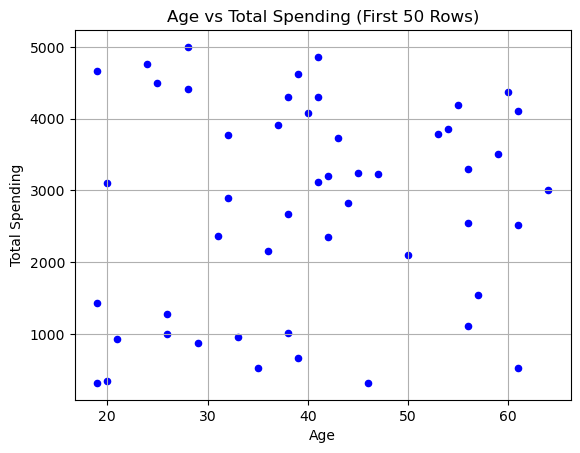

In [21]:
#Step 3 refined : Visualize the data
# Scatter plot of Age vs Total Spending for the first 50 rows

# Using pandas plot method directly for scatter plot
data.head(50).plot(x='Age', y='Total_Spending', kind='scatter', 
                   title='Age vs Total Spending (First 50 Rows)', 
                   color='blue', marker='o')

# Additional customizations
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

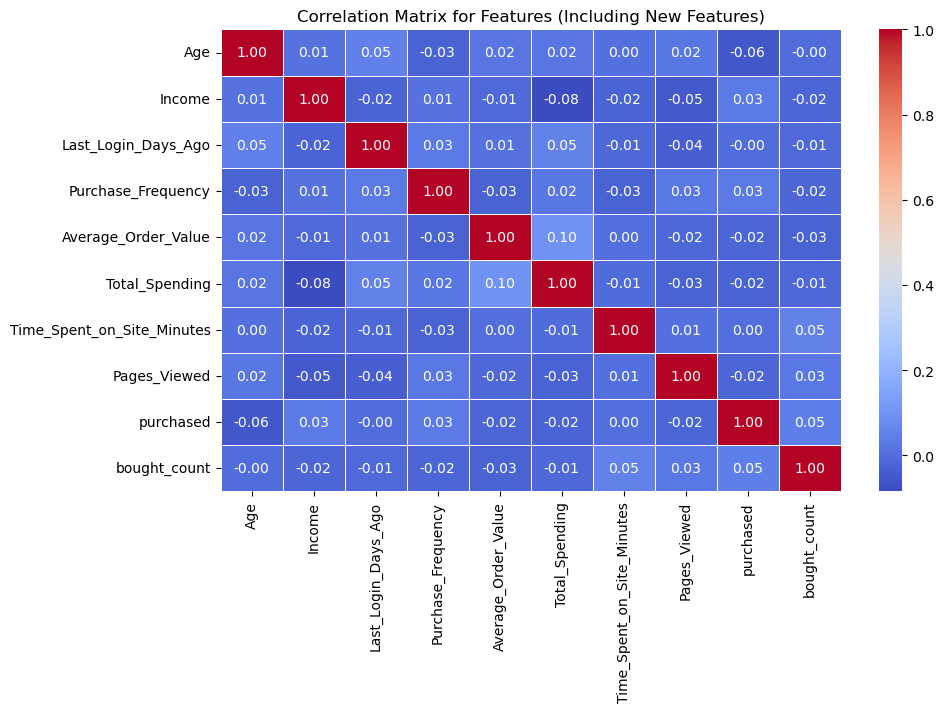

In [22]:
# Step 3.1: Add new features

np.random.seed(42)  # For reproducibility

# Adding the 'purchased' feature (binary: 0 or 1)
data['purchased'] = np.random.choice([0, 1], size=len(data))  # Randomly assign purchase status

# Adding the 'visitor' feature (categorical: 'New' or 'Returning')
data['visitor'] = np.random.choice(['New', 'Returning'], size=len(data))  # Randomly assign visitor type

# Adding 'bought_count' feature (random integer between 0 and 20, representing how many items were bought)
data['bought_count'] = np.random.randint(0, 20, size=len(data))  # Random count of items purchased

# Encode 'visitor' as categorical (0 = New, 1 = Returning)
data['visitor'] = LabelEncoder().fit_transform(data['visitor'])

# Step 3.2: Correlation Matrix

# Define numeric columns to include in the correlation matrix (original plus new features)
numeric_columns = [
    'Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 
    'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 
    'Pages_Viewed', 'purchased', 'bought_count'
]

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Features (Including New Features)')
plt.show()

Model Accuracy: 0.4867

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       144
           1       0.51      0.46      0.48       156

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



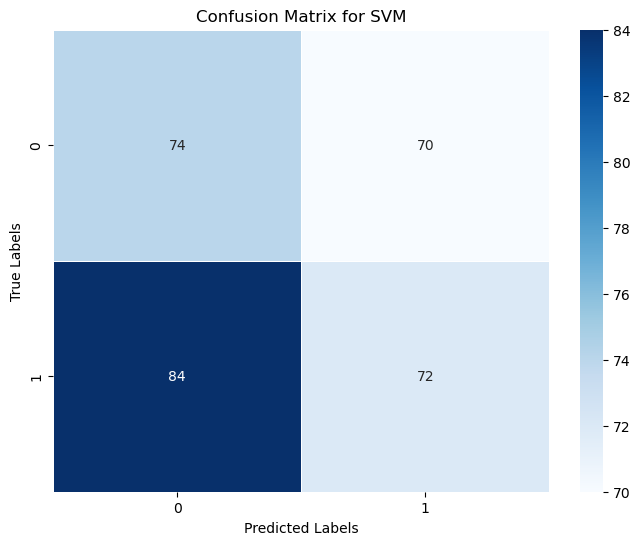

In [23]:
# Step 4: Define features and target for Support Vector Machine (SVM)

# Add some new features (simulate data)
np.random.seed(42)  # For reproducibility
data['purchased'] = np.random.choice([0, 1], size=len(data))  # Binary flag: Purchased or not
data['visitor'] = np.random.choice(['New', 'Returning'], size=len(data))  # Categorical: Visitor type
data['bought_count'] = np.random.randint(0, 20, size=len(data))  # Random count of items purchased

# Encode 'visitor' as categorical (numeric values)
data['visitor'] = LabelEncoder().fit_transform(data['visitor'])

# Define the features (X) and target (y) for the SVM model
features = [
    'Age', 'Income', 'Total_Spending', 'Pages_Viewed', 'Gender', 'Location', 
    'Interests', 'Newsletter_Subscription', 'Time_Spent_on_Site_Minutes', 
    'Purchase_Frequency', 'Average_Order_Value', 'visitor', 'bought_count'
]

# Target variable 'purchased'
X = data[features]
y = data['purchased']

# Step 4.1: Data Preprocessing - Scale the features (important for SVM)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features (important for SVM)

# Step 4.2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4.3: Train the Support Vector Machine (SVM) model
from sklearn.svm import SVC

# Initialize the Support Vector Machine model with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Step 4.4: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

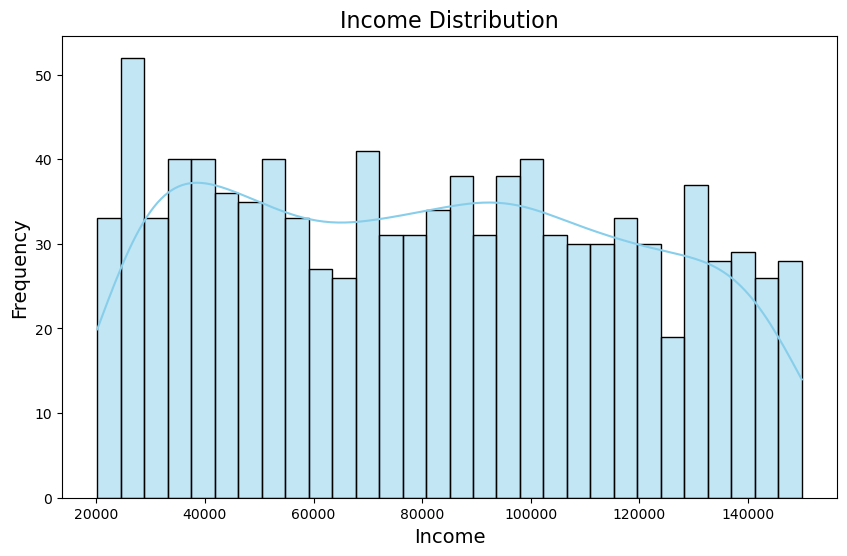

In [24]:
# Step: Visualize the distribution of 'Income' with a histplot

import seaborn as sns
import matplotlib.pyplot as plt

# Create the histplot for 'Income'
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.histplot(data['Income'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels for clarity
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


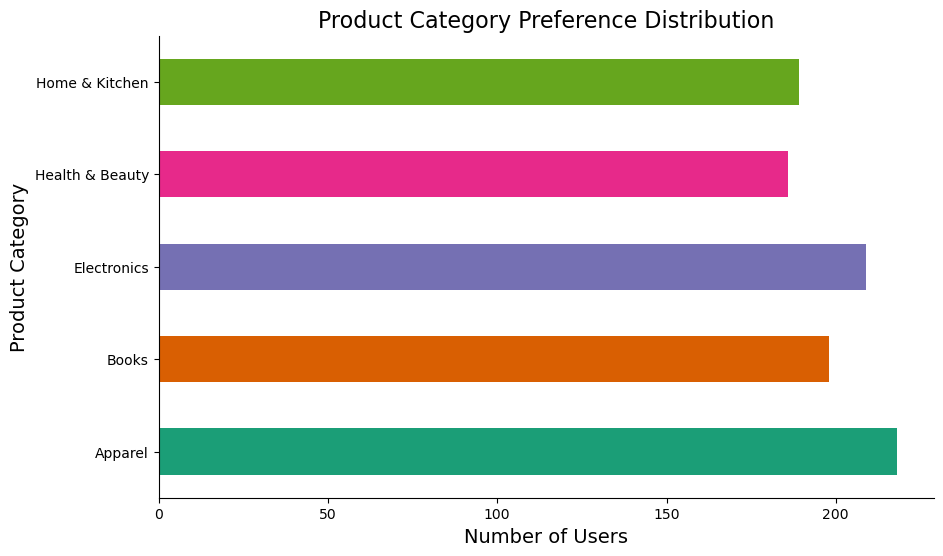

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'Product_Category_Preference' and count occurrences
category_counts = data.groupby('Product_Category_Preference').size()

# Plot a horizontal bar plot with custom colors from the 'Dark2' palette
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
category_counts.plot(kind='barh', color=sns.color_palette('Dark2', len(category_counts)))

# Set the title and labels for clarity
plt.title('Product Category Preference Distribution', fontsize=16)
plt.xlabel('Number of Users', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Remove top and right spines for a cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure that the features are scaled and ready for SVM
# Assuming 'X_scaled' is already scaled using StandardScaler
# If not, apply StandardScaler:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Stratified Split: Ensures class distribution is balanced in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,  # Features and target
    test_size=0.3,  # 30% for testing
    random_state=42,  # Random state for reproducibility
    stratify=y  # Ensure balanced class distribution
)

# Display the shape of the resulting datasets for verification
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(700, 13), y_train=(700,)
Testing data shape: X_test=(300, 13), y_test=(300,)



Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       147
           1       0.54      0.61      0.57       153

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



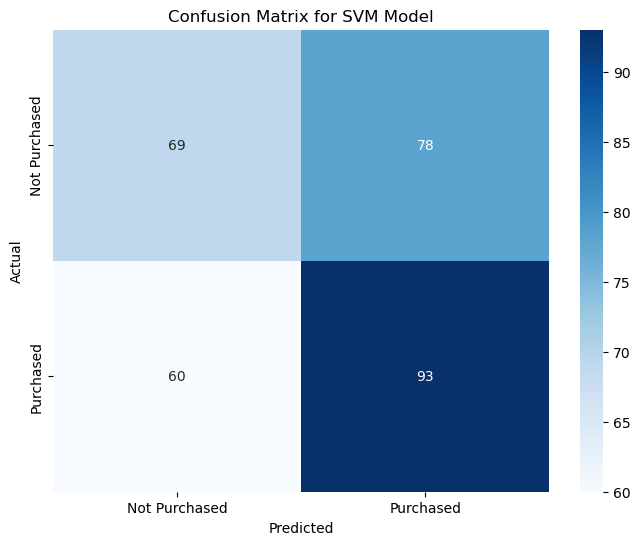

SVM Model Accuracy: 0.5400


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1)  # Linear kernel with regularization parameter C
svm_model.fit(X_train, y_train)  # Fit the model on the training data

# Step 7: Make Predictions and Evaluate the Model
y_pred = svm_model.predict(X_test)  # Predict on the test data

# Display the classification report for detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the Accuracy of the Model
accuracy = svm_model.score(X_test, y_test)  # Accuracy on the test set
print(f"SVM Model Accuracy: {accuracy:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       147
           1       0.54      0.61      0.57       153

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



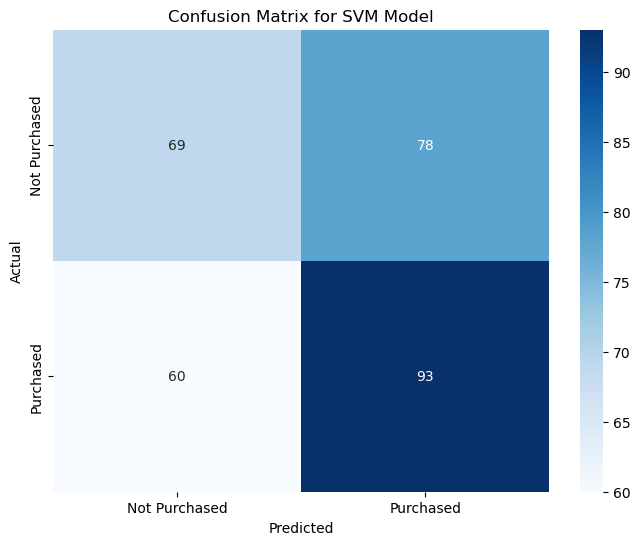

SVM Model Accuracy: 0.5400


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1)  # Linear kernel with regularization parameter C
svm_model.fit(X_train, y_train)  # Fit the model on the training data

# Step 7: Make Predictions and Evaluate the Model
y_pred = svm_model.predict(X_test)  # Predict on the test data

# Display the classification report for detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the Accuracy of the Model
accuracy = svm_model.score(X_test, y_test)  # Accuracy on the test set
print(f"SVM Model Accuracy: {accuracy:.4f}")

C:\Users\shivh\AppData\Local\Temp\ipykernel_14144\145725241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')


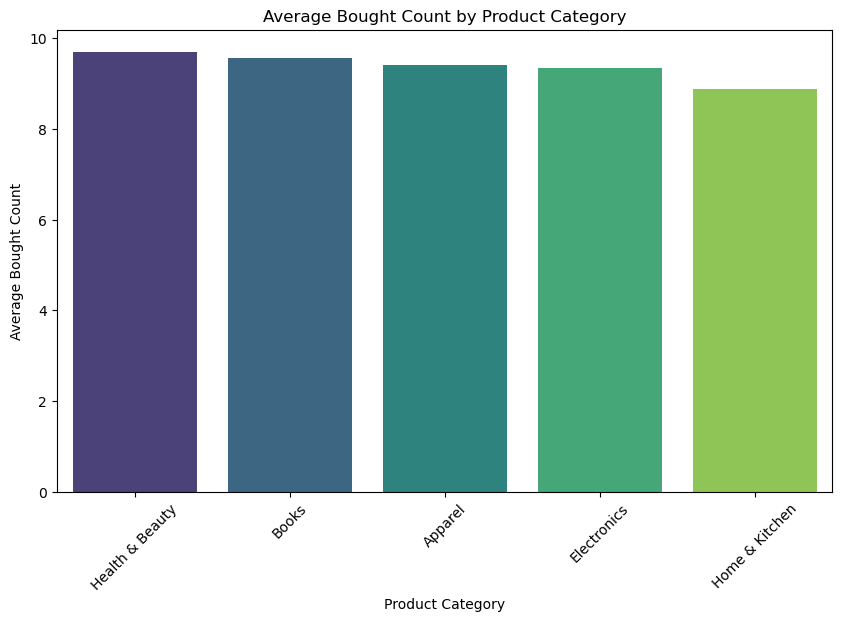

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Product_Category_Preference' column exists in your dataset
# If the column doesn't exist, you'll need to create or simulate it.
# I'll assume 'Product_Category_Preference' exists in the dataset.
# If not, you can create a simulated version (as shown below).

# Step 7: Visualize the average bought count by product category
# Group by 'Product_Category_Preference' and calculate the average bought count
bought_count_ranking = data.groupby('Product_Category_Preference')['bought_count'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')

# Add titles and labels
plt.title('Average Bought Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Bought Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\shivh\AppData\Local\Temp\ipykernel_14144\338005873.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')


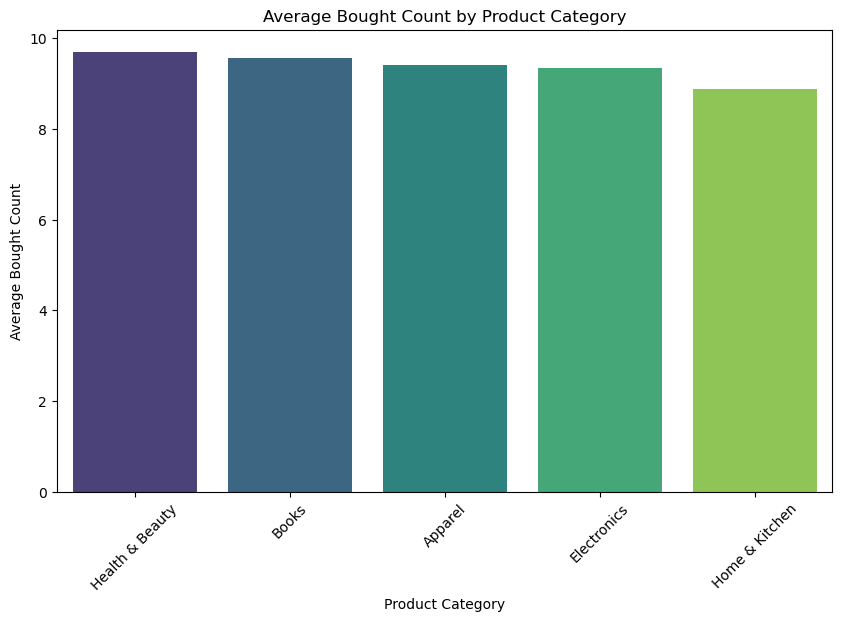

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Product_Category_Preference' column exists in your dataset
# If not, you will need to either create it or simulate it
# Let's check if the column exists first
if 'Product_Category_Preference' not in data.columns:
    print("Product_Category_Preference column is missing.")
    # Optionally simulate a column for demonstration purposes
    categories = ['Electronics', 'Apparel', 'Home & Kitchen', 'Books', 'Health & Beauty', 'Food', 'Sports', 'Technology']
    np.random.seed(42)
    data['Product_Category_Preference'] = np.random.choice(categories, size=len(data))

# Step 8: Visualize the ranking of bought count by product category
bought_count_ranking = data.groupby('Product_Category_Preference')['bought_count'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bought_count_ranking.index, y=bought_count_ranking.values, palette='viridis')

# Add titles and labels
plt.title('Average Bought Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Bought Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\shivh\AppData\Local\Temp\ipykernel_14144\3853294504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='coolwarm')


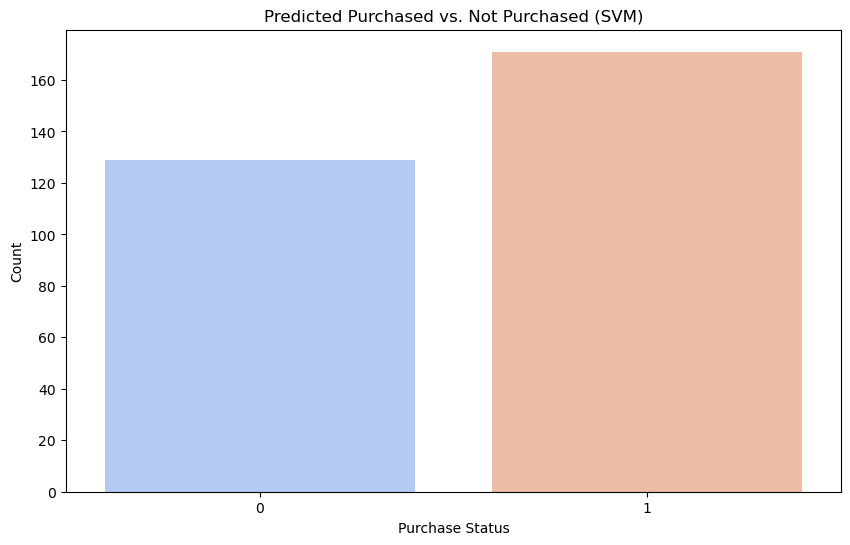

In [31]:
# Step 9: Aggregate Product Preferences from Predictions

# Use the model's predictions (y_pred) to aggregate the predicted purchase status
predicted_counts = pd.Series(y_pred).value_counts()

# Plot the predicted purchase status (Purchased vs Not Purchased)
plt.figure(figsize=(10, 6))
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, palette='coolwarm')

# Add title and labels
plt.title('Predicted Purchased vs. Not Purchased (SVM)')
plt.xlabel('Purchase Status')
plt.ylabel('Count')

# Display the plot
plt.show()